# Process Player Data
We attempt to make sense of the player data by looking at certain distributions

In [11]:
from datetime import datetime

def extract_age(birthday_str):
    """
    Extracts age from a birthday string in format "Month Day, Year (Age)".

    Args:
      birthday_str (str): The birthday string containing month, day, year, and age.

    Returns:
      int: The extracted age as an integer.
    """
    # Split the string into components
    month, day, year, age = birthday_str.split()

    # Extract year (assuming age is in parentheses)
    age = int(age[1:-1])  # Remove closing parenthesis

    return age

In [12]:
def add_age_column(df):
    birthday_col = df['Birthday']
    ages = []
    for birthday_str in birthday_col:
        ages.append(extract_age(birthday_str))
    assert(len(ages) == len(birthday_col))
    df['Age'] = ages
    return df

In [14]:
import pandas as pd

prem_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/prem_player_data.csv')
prem_player_data_df = add_age_column(prem_player_data_df)
laliga_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/laliga_player_data.csv')
laliga_player_data_df = add_age_column(laliga_player_data_df)
bundesliga_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/bundesliga_player_data.csv')
bundesliga_player_data_df = add_age_column(bundesliga_player_data_df)
serie_a_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/serie_a_player_data.csv')
serie_a_player_data_df = add_age_column(serie_a_player_data_df)
ligue_1_player_data_df = pd.read_csv('/kaggle/input/collected-data/Player Data/ligue_1_player_data.csv')
ligue_1_player_data_df = add_age_column(ligue_1_player_data_df)

# Get Basic Distributions
1. Age Distribution
2. Position Distribution

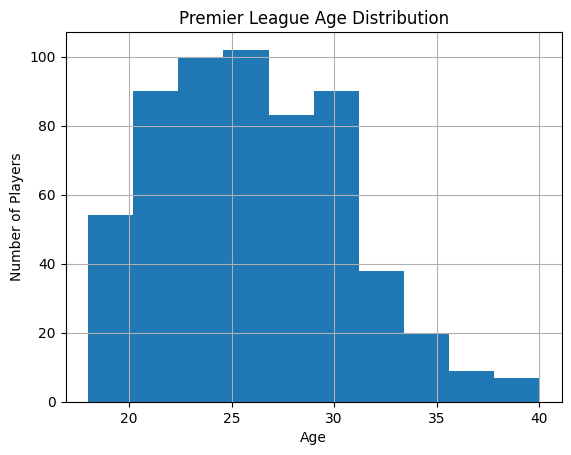

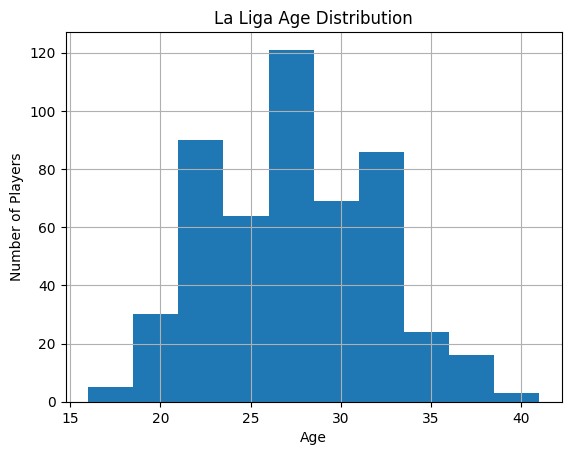

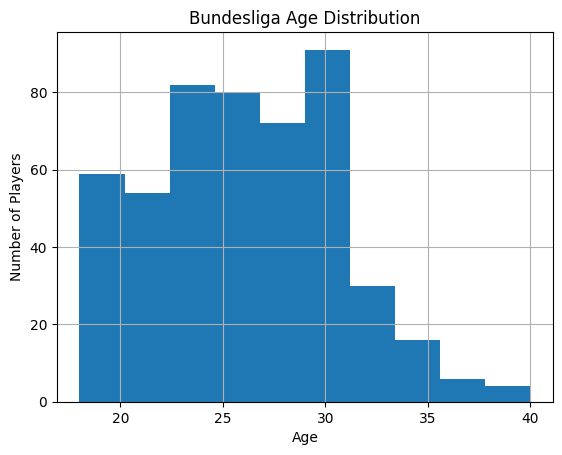

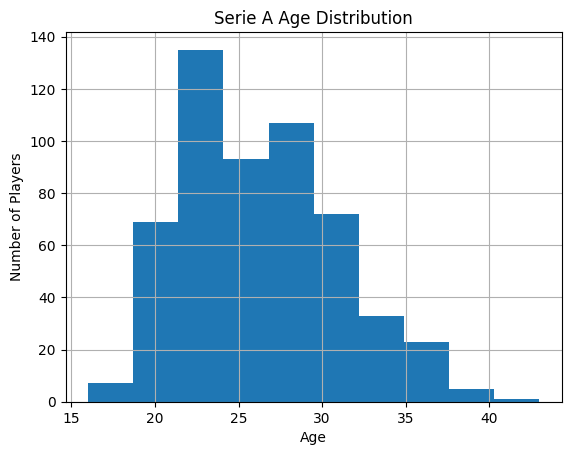

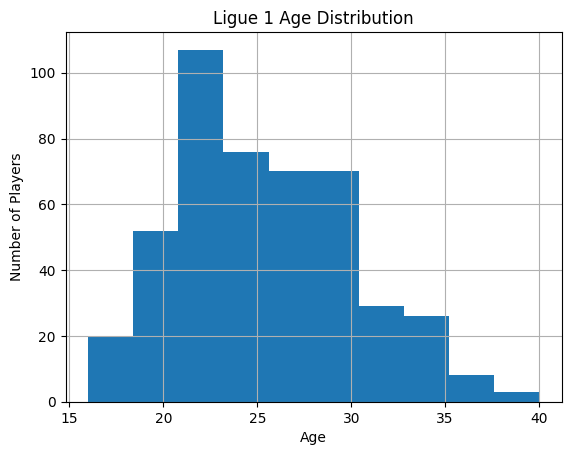

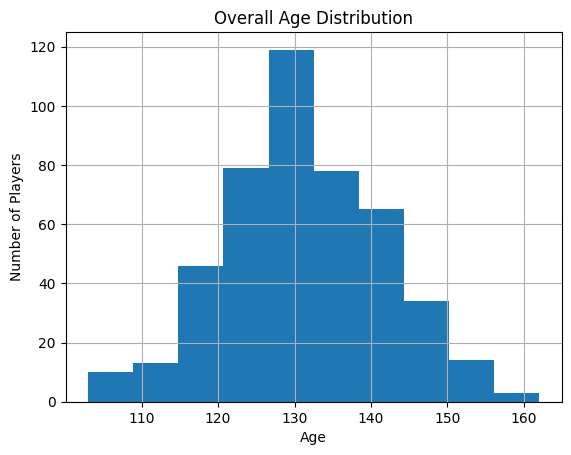

In [50]:
import matplotlib.pyplot as plt
import numpy as np

def get_age_dist(age, title):
    plt.hist(age)
    plt.xlabel('Age')
    plt.ylabel('Number of Players')
    plt.title(title)
    plt.grid(True)
    plt.show()

get_age_dist(prem_player_data_df["Age"], "Premier League Age Distribution")
get_age_dist(laliga_player_data_df["Age"], "La Liga Age Distribution")
get_age_dist(bundesliga_player_data_df["Age"], "Bundesliga Age Distribution")
get_age_dist(serie_a_player_data_df["Age"], "Serie A Age Distribution")
get_age_dist(ligue_1_player_data_df["Age"], "Ligue 1 Age Distribution")
get_age_dist(prem_player_data_df["Age"] + laliga_player_data_df["Age"] + bundesliga_player_data_df["Age"] + serie_a_player_data_df["Age"] + ligue_1_player_data_df["Age"], "Overall Age Distribution")

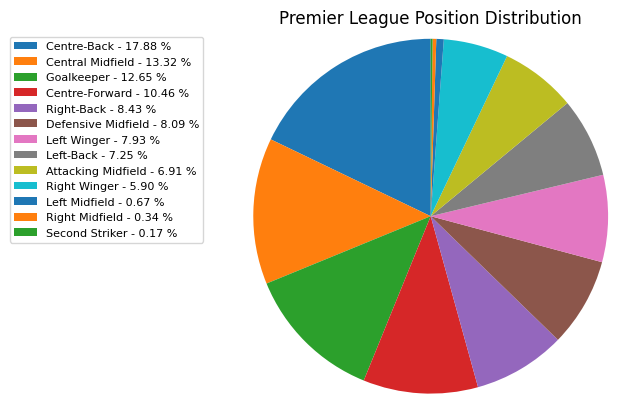

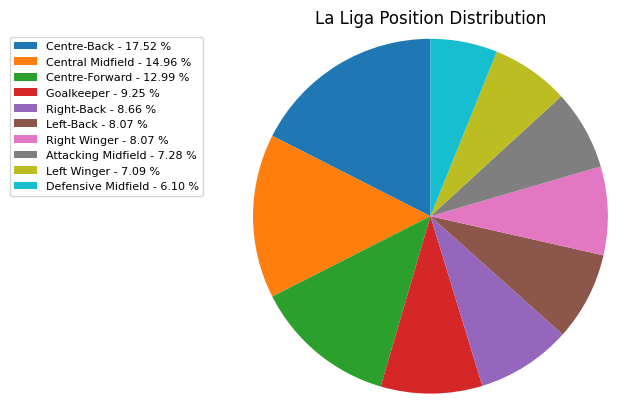

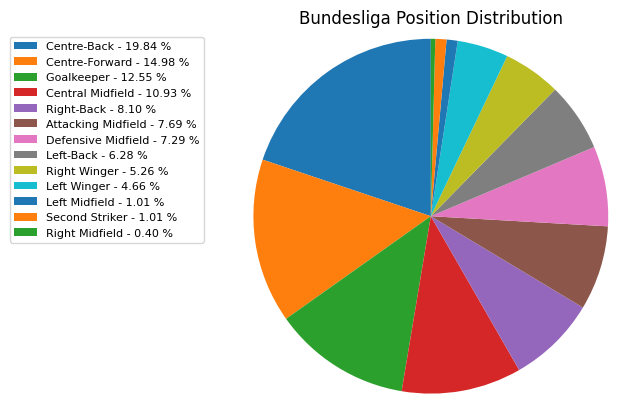

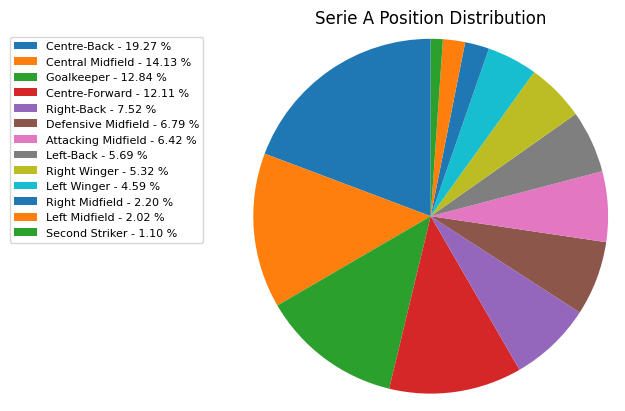

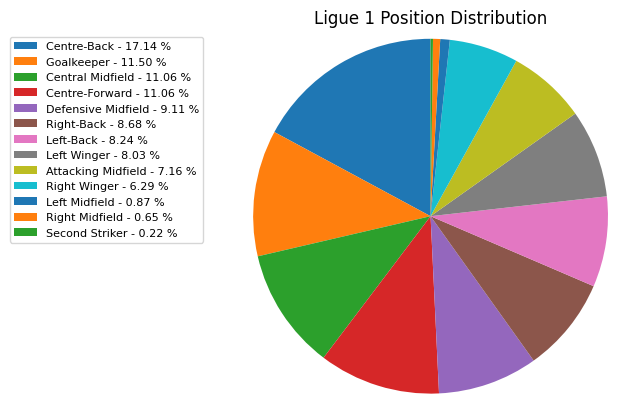

In [69]:
def get_pos_dist(pos, title):
    # Count player occurrences for each position
    position_counts = pos.value_counts()

    # Get pie chart slice labels from the index of position_counts
    x = position_counts.index.to_numpy()  # Convert index to NumPy array

    # Get pie chart slice values from the values of position_counts
    y = position_counts.to_numpy()

#     colors = ['yellowgreen','red','gold','lightskyblue','white','lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                              key=lambda x: x[2],
                                              reverse=True))

    plt.legend(patches, labels, bbox_to_anchor=(-0.1, 1.),
               fontsize=8)
    plt.title(title)
    plt.show()
get_pos_dist(prem_player_data_df["Position"], "Premier League Position Distribution")
get_pos_dist(laliga_player_data_df["Position"], "La Liga Position Distribution")
get_pos_dist(bundesliga_player_data_df["Position"], "Bundesliga Position Distribution")
get_pos_dist(serie_a_player_data_df["Position"], "Serie A Position Distribution")
get_pos_dist(ligue_1_player_data_df["Position"], "Ligue 1 Position Distribution")


# Frequency of injury in each league

In [32]:
def get_injury_stats(df):
    injuries = df['Injuries']
    injured = 0
    not_injured = 0
    for injury in injuries:
        # Convert sting to dictionary
        injury = eval(injury)
        if len(injury) == 0:
            not_injured += 1
        else:
            injured += 1
    return injured, not_injured

prem_injured, prem_not_injured = get_injury_stats(prem_player_data_df)
laliga_injured, laliga_not_injured = get_injury_stats(laliga_player_data_df)
bundesliga_injured, bundesliga_not_injured = get_injury_stats(bundesliga_player_data_df)
serie_a_injured, serie_a_not_injured = get_injury_stats(serie_a_player_data_df)
ligue_1_injured, ligue_1_not_injured = get_injury_stats(ligue_1_player_data_df)

total_injured = prem_injured + laliga_injured + bundesliga_injured + serie_a_injured + ligue_1_injured
total_not_injured = prem_not_injured + laliga_not_injured + bundesliga_not_injured + serie_a_not_injured + ligue_1_not_injured

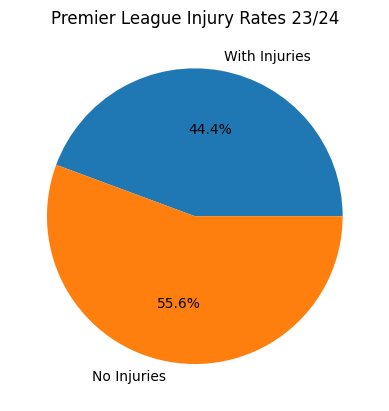

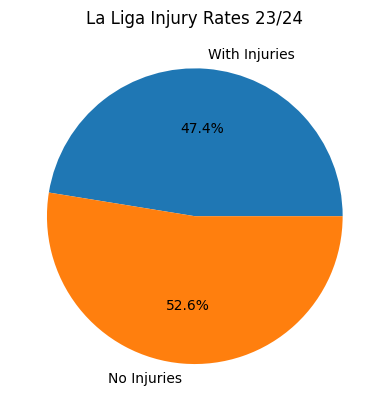

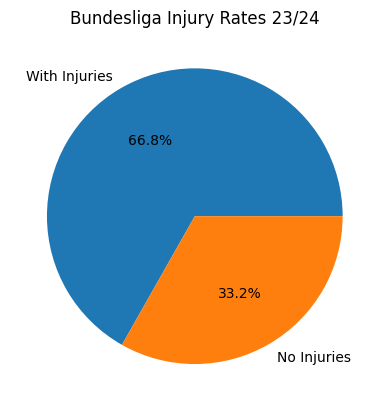

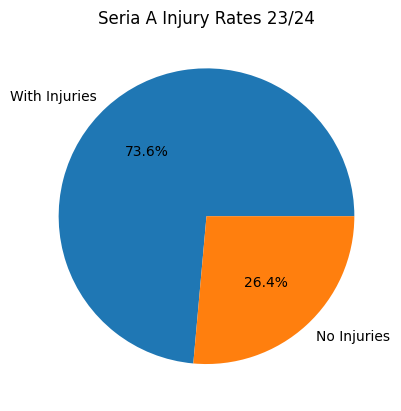

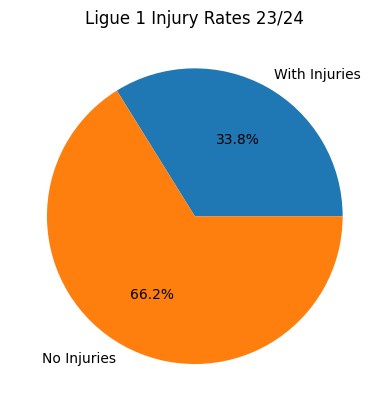

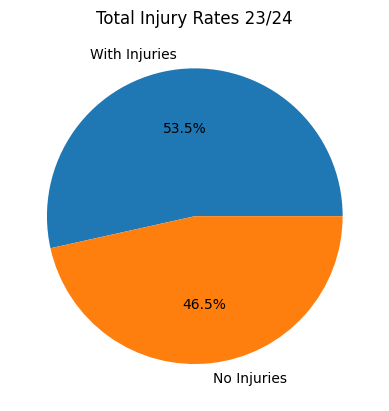

In [45]:
def get_injury_chart(injured, not_injured, title):
    total = injured + not_injured
    sizes = np.array([injured / total, not_injured / total])
    labels = ["With Injuries", "No Injuries"]
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.pie(sizes, labels=labels, autopct='%1.1f%%')
    
get_injury_chart(prem_injured, prem_not_injured, "Premier League Injury Rates 23/24")
get_injury_chart(laliga_injured, laliga_not_injured, "La Liga Injury Rates 23/24")
get_injury_chart(bundesliga_injured, bundesliga_not_injured, "Bundesliga Injury Rates 23/24")
get_injury_chart(serie_a_injured, serie_a_not_injured, "Seria A Injury Rates 23/24")
get_injury_chart(ligue_1_injured, ligue_1_not_injured, "Ligue 1 Injury Rates 23/24")
get_injury_chart(total_injured, total_not_injured, "Total Injury Rates 23/24")